In [26]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cars24-car-price-clean.csv')

In [3]:
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-1.111046,-0.801317,1.195828,0.045745,-1.310754,-1.157780,0.801317,-0.433854,-1.125683,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
1,-0.223944,0.450030,-0.737872,-0.140402,-0.537456,-0.360203,-0.450030,-0.327501,-0.333227,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
2,-0.915058,-1.426990,0.035608,-0.582501,-0.537456,-0.404885,1.426990,-0.327501,-0.789807,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
3,-0.892365,-0.801317,-0.409143,0.329620,-0.921213,-0.693085,0.801317,-0.433854,-0.905265,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
4,-0.182683,0.137194,-0.544502,0.760085,0.042999,0.010435,-0.137194,-0.246579,-0.013096,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728


In [8]:
X  =df.loc[:,'year':'>5'].to_numpy()
Y = df['selling_price'].to_numpy()

In [14]:
ones = np.ones((X.shape[0],1))
X = np.hstack((ones,X))

In [23]:
def hypothesis(x,weight):
    y_hat = np.dot(x,weight)
    return y_hat

def error(x,y,weight):
    n = x.shape[0]
    y_hat = hypothesis(x,weight)
    err = np.sum((y-y_hat)**2)
    return err/n
def gradient(x,y,weight):
    n = x.shape[0]
    y_hat = hypothesis(x,weight)
    final_value = np.dot(x.T,y_hat-y)
    return final_value/n

def gradient_decent(x,y,epochs=20,lr=0.1):
    err_list = []
    n = x.shape[1]
    weights = np.zeros((n,))
    
    for i in range(epochs):
        errr = error(x,y,weights)
        err_list.append(errr)
        
        grad = gradient(x,y,weights)
        weights = weights - lr*grad
    return weights,err_list
        
    

In [24]:
weights,err_list = gradient_decent(X,Y)

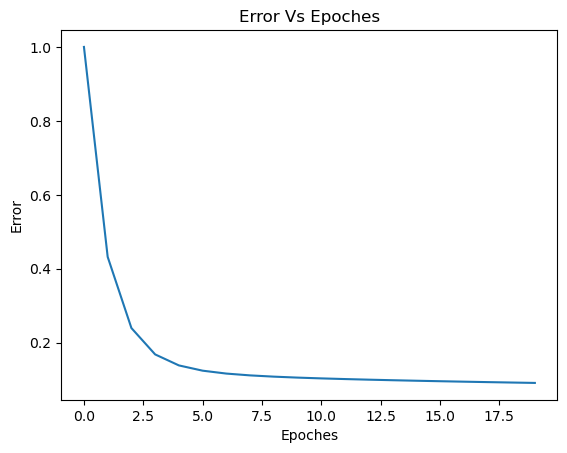

In [29]:
plt.plot(err_list)
plt.title('Error Vs Epoches')
plt.xlabel('Epoches')
plt.ylabel('Error')
plt.show()

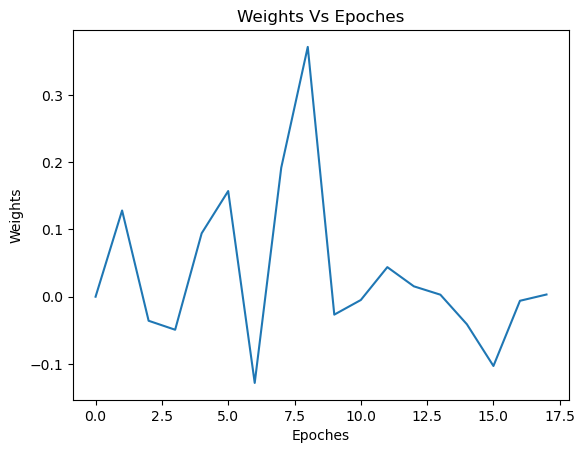

In [33]:
plt.plot(weights)
plt.title('Weights Vs Epoches')
plt.xlabel('Epoches')
plt.ylabel('Weights')
plt.show()